# Data Science never stop

As spoken, R is the best calculator of data science, however time is flowing, data is rolling over time, we have to automate the measurement and generate the friendly report to management team (user). Therefore, many programming languages can solve this problem, Python is one of the best language which I recommended.

# Friendly Libraries in Python

Many programmers complaint Python is abnormal language, they can develop with normal programming logic, but I still strongly recommend it. Because Python has powerful data frame libraries, such as pandas (data frame) and numpy (array/matrix), measuring bulky data with high performance; high flexibility in reporting, data visualization with many graph libraries, interactive dashboard with Flask or Django, common report with csv or excel spreadsheet; cross platform input, SQL, NoSQL, Excel, etc...

# Python ARIMA

According to the previous R example (), we found that ARMA(2,1) was the suitable model of the annual flows, we moved the R result into Python in the blog.
First of all, we had to import the related libraries, such numpy, pandas, matplotlib and statsmodels. Then imported the previous dataset and named as 'data'.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
data = pd.read_csv('../Annual_flows.csv')
data.index = pd.Index(sm.tsa.datetools.dates_from_range('1911', '1972'))
data.tail()

,Year,AnnualFlows
1968-12-31,1968,10.73
1969-12-31,1969,11.06
1970-12-31,1970,9.92
1971-12-31,1971,11.39
1972-12-31,1972,11.52


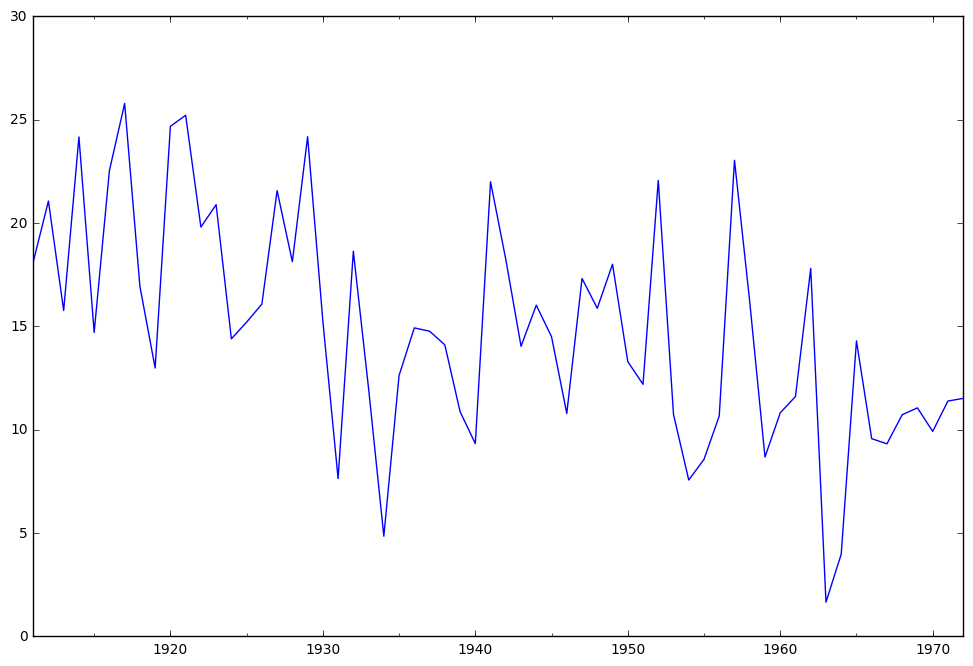

In [3]:
# Quick view of the time series 
data['AnnualFlows'].plot(figsize=(12,8))

# Preparing data

Same as the previous example in R, the data isn't stationary, we have to process log differencing and remove mean. Then generated the ACF and PACF graphs for model selection, lag-2 are significant in both ACF and PACF. Therefore, we applied the same model with R, ARMA(2,1), it got the similar AIC, 72.035 and passed the Q-Q plot testing. 

In [4]:
dld = np.log(data['AnnualFlows']).diff()
dlmd = dld - dld.mean()
dlmd.tail()

1968-12-31    0.148297
1969-12-31    0.037707
1970-12-31   -0.101366
1971-12-31    0.145599
1972-12-31    0.018765
Name: AnnualFlows, dtype: float64

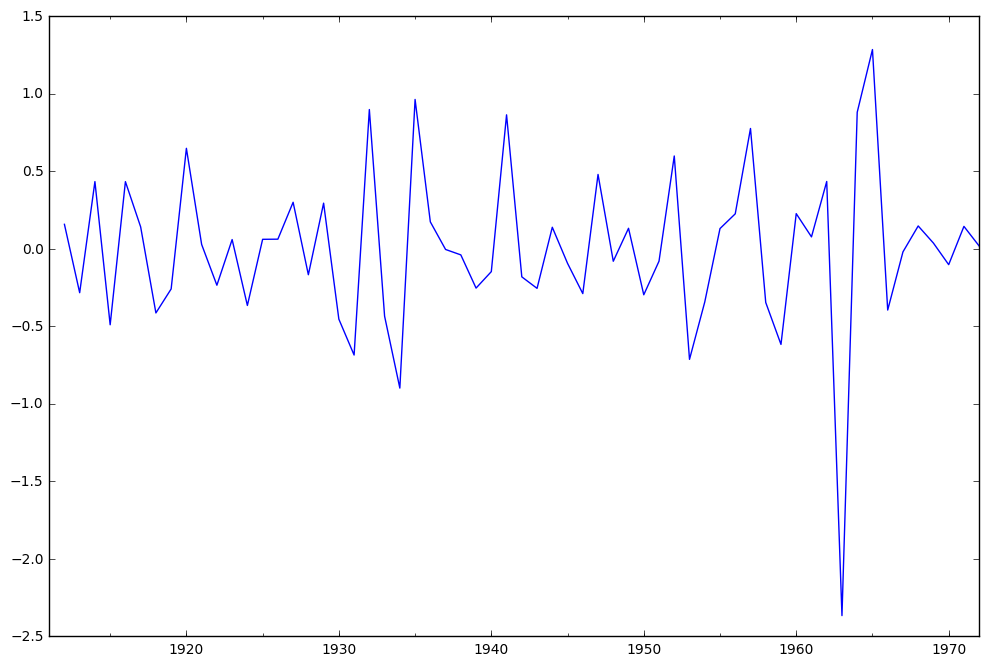

In [5]:
# Quick view after log differencing
dlmd.plot(figsize=(12,8))

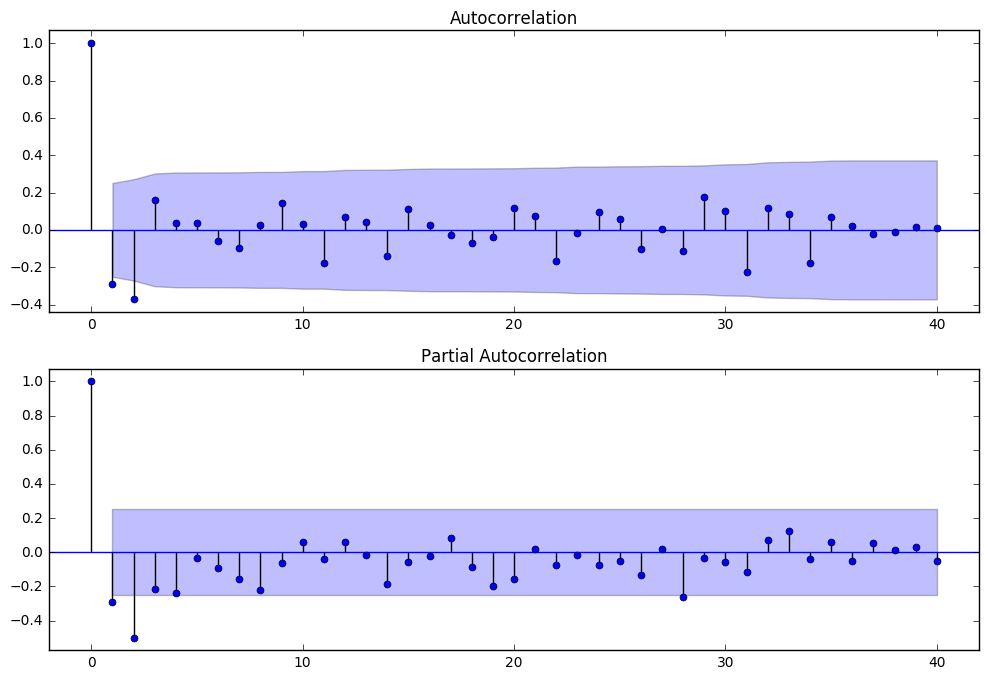

In [6]:
# ACF and PACF results of 'dlmd'
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dlmd[1:].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dlmd[1:], lags=40, ax=ax2)

In [7]:
# generate the ARMA(2,1) model with ARMA function in statsmodels library
arma21 = sm.tsa.ARMA(dlmd[1:], (2,1)).fit()
print(arma21.summary())
# AIC is 72.035, similar with the result in R

                              ARMA Model Results                              
Dep. Variable:            AnnualFlows   No. Observations:                   61
Model:                     ARMA(2, 1)   Log Likelihood                 -31.018
Method:                       css-mle   S.D. of innovations              0.388
Date:                Sat, 17 Jun 2017   AIC                             72.035
Time:                        07:49:51   BIC                             82.590
Sample:                    12-31-1912   HQIC                            76.172
                         - 12-31-1972                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0058      0.003     -2.207      0.031      -0.011      -0.001
ar.L1.AnnualFlows     0.1749      0.124      1.407      0.165      -0.069       0.419
ar.L2.AnnualFlows    -0.

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


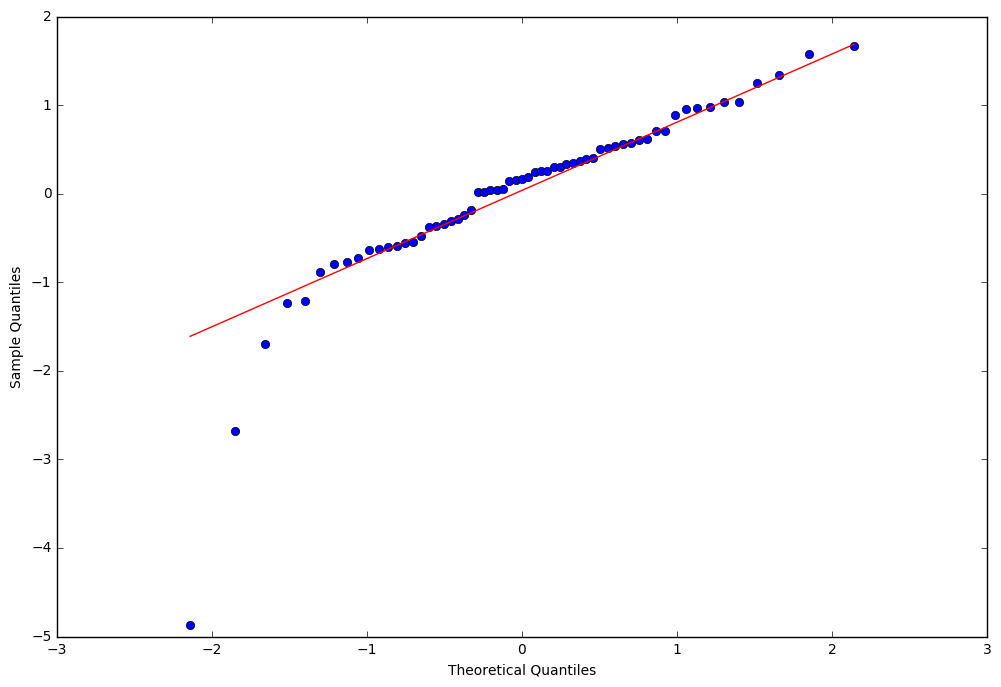

In [8]:
# testing in Q-Q plot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(arma21.resid, line='q', ax=ax, fit=True)

# Prediction

We could move to the next step, prediction, similar with R, the predict function is very convenient.

In [9]:
# Prediction with .predict()
pred = arma21.predict('1973', '1980', dynamic=True)
print(pred)

1973-12-31   -0.255099
1974-12-31   -0.055182
1975-12-31    0.043960
1976-12-31    0.014452
1977-12-31   -0.013942
1978-12-31   -0.011993
1979-12-31   -0.004998
1980-12-31   -0.004232
Freq: A-DEC, dtype: float64


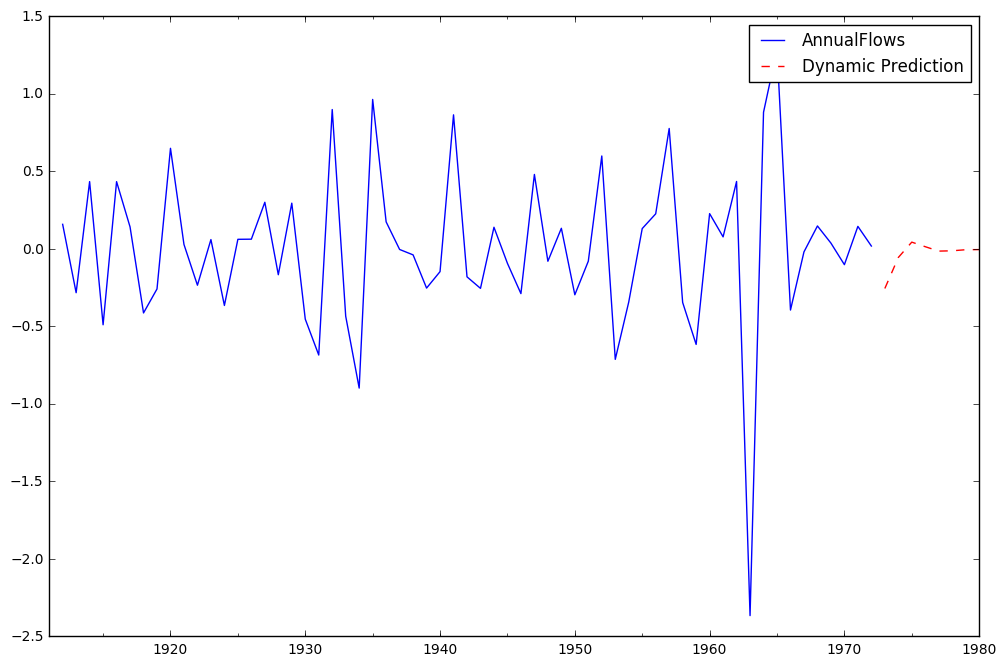

In [10]:
# Quick view of log prediction
ax = dlmd.ix[0:].plot(figsize=(12,8))
fig = pred.plot(ax=ax, style='r--', label='Dynamic Prediction');
fig.legend();

In [11]:
LogPred = np.exp(pred+dld.mean())
print(LogPred)

1973-12-31    0.769115
1974-12-31    0.939321
1975-12-31    1.037220
1976-12-31    1.007061
1977-12-31    0.978869
1978-12-31    0.980778
1979-12-31    0.987662
1980-12-31    0.988420
Freq: A-DEC, dtype: float64


In [12]:
result = pd.concat([data['AnnualFlows'], LogPred], axis=1)
result = result.rename(columns = {0:'Prediction'}) 
result.tail(10)

,AnnualFlows,Prediction
1971-12-31,11.39,NaN
1972-12-31,11.52,NaN
1973-12-31,NaN,0.769115
1974-12-31,NaN,0.939321
1975-12-31,NaN,1.037220
1976-12-31,NaN,1.007061
1977-12-31,NaN,0.978869
1978-12-31,NaN,0.980778
1979-12-31,NaN,0.987662
1980-12-31,NaN,0.988420


In [13]:
dlist = ['1973','1974','1975','1976','1977','1978','1979','1980']
result['Prediction']['1973'] = result['Prediction']['1973'].values*result['AnnualFlows']['1972'].values
for i in range(0,len(dlist)-1):
    result['Prediction'][dlist[i+1]] = result['Prediction'][dlist[i+1]].values*result['Prediction'][dlist[i]].values

In [14]:
result.tail(10)

,AnnualFlows,Prediction
1971-12-31,11.39,NaN
1972-12-31,11.52,NaN
1973-12-31,NaN,8.860206
1974-12-31,NaN,8.322578
1975-12-31,NaN,8.632343
1976-12-31,NaN,8.693292
1977-12-31,NaN,8.509591
1978-12-31,NaN,8.346020
1979-12-31,NaN,8.243049
1980-12-31,NaN,8.147592


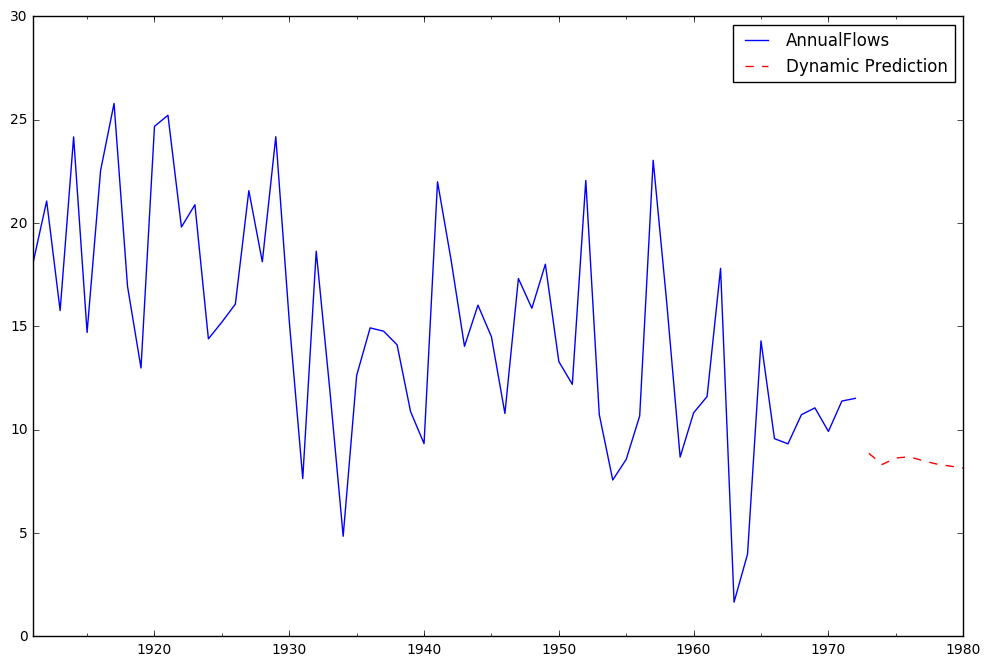

In [15]:
ax = result['AnnualFlows'].ix[0:].plot(figsize=(12,8))
fig = result['Prediction'].plot(ax=ax, style='r--', label='Dynamic Prediction');
fig.legend();

# Conclusion

The measurements and results between Python and R are similar, but R can measure more accurately. But Python can have the deeper development, such as push prediction into dashboard, interactive report with slider control, monitor and alert.